In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

%matplotlib inline

## Reading Dataset

In [2]:
train = pd.read_csv("/kaggle/input/cte-tech-weekend-23/train.csv")
test = pd.read_csv("/kaggle/input/cte-tech-weekend-23/test.csv")
sample_submission = pd.read_csv("/kaggle/input/cte-tech-weekend-23/sample_submission.csv")
train.head()

,Unnamed: 0,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,price
0,143728,143728,0.53,0,0,1,0,0,0,1,...,0,1,0,0,62.0,56.0,5.16,5.20,3.21,1656
1,52657,52657,0.50,0,1,0,0,0,0,0,...,0,0,0,0,63.8,56.0,4.89,5.02,3.18,1063
2,124407,124407,2.03,0,0,1,0,0,0,0,...,0,0,0,0,59.2,60.0,8.39,8.29,4.94,18508
3,45535,45535,0.33,0,0,1,0,0,0,1,...,0,1,0,0,61.5,55.0,4.41,4.47,2.73,723
4,178894,178894,0.90,0,1,0,0,0,0,0,...,0,1,0,0,63.6,59.0,6.04,6.08,3.86,3187


## Data Exploration

In [3]:
train.sample(5)

,Unnamed: 0,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,price
19693,133142,133142,0.41,0,0,0,0,1,1,0,...,0,1,0,0,61.4,61.0,4.73,4.78,2.92,935
56913,100556,100556,0.30,0,0,0,0,1,0,0,...,0,0,0,0,62.9,56.0,4.27,4.29,2.70,554
413,71061,71061,1.10,0,0,1,0,0,0,0,...,0,0,0,0,61.2,56.0,6.65,6.68,4.09,4434
120609,48062,48062,1.01,0,0,0,0,1,0,0,...,0,1,0,0,63.3,58.0,6.29,6.37,4.01,3299
96835,65640,65640,0.90,0,1,0,0,0,0,0,...,0,0,0,0,63.8,56.0,6.12,6.15,3.91,3733


In [4]:
test.sample(5)

,Unnamed: 0,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26
9695,109737,109737,1.51,0,0,0,1,0,0,0,...,0,0,1,0,0,61.6,58.0,7.32,7.41,4.55
9655,60973,60973,1.52,0,0,0,0,1,0,0,...,0,0,0,0,0,63.4,53.0,7.34,7.31,4.65
50388,58240,58240,0.72,0,0,0,0,1,0,0,...,0,0,0,1,0,61.1,58.0,5.75,5.78,3.52
5368,117370,117370,0.33,0,0,1,0,0,0,0,...,0,0,1,0,0,61.4,57.0,4.48,4.46,2.74
9889,90450,90450,0.32,0,0,1,0,0,0,0,...,1,0,0,0,0,62.2,54.0,4.42,4.40,2.75


### Checking Number of Observations & Variables

In [5]:
train.shape

(135501, 29)

total 135,501 observations

### Dataset Detail

In [6]:
train.describe()

,Unnamed: 0,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,price
count,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,...,135501.00000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000
mean,96855.699397,96855.699397,0.791073,0.010243,0.060915,0.477428,0.257415,0.193999,0.125143,0.185895,...,0.15867,0.249061,0.053800,0.081379,61.821249,57.229102,5.715995,5.720706,3.534521,3973.809131
std,55910.125881,55910.125881,0.463126,0.100691,0.239175,0.499492,0.437212,0.395429,0.330882,0.389024,...,0.36537,0.432471,0.225624,0.273418,1.081360,1.921666,1.110367,1.103322,0.686486,4039.295151
min,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,52.700000,51.000000,0.000000,0.000000,0.000000,326.000000
25%,48413.000000,48413.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,61.300000,56.000000,4.700000,4.710000,2.900000,948.000000
50%,96819.000000,96819.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,61.900000,57.000000,5.710000,5.720000,3.530000,2404.000000
75%,145356.000000,145356.000000,1.030000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,193572.000000,3.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,71.600000,79.000000,9.650000,9.590000,8.400000,18818.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135501 entries, 0 to 135500
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   135501 non-null  int64  
 1   id           135501 non-null  int64  
 2   Feature 1    135501 non-null  float64
 3   Feature 2    135501 non-null  int64  
 4   Feature 3    135501 non-null  int64  
 5   Feature 4    135501 non-null  int64  
 6   Feature 5    135501 non-null  int64  
 7   Feature 6    135501 non-null  int64  
 8   Feature 7    135501 non-null  int64  
 9   Feature 8    135501 non-null  int64  
 10  Feature 9    135501 non-null  int64  
 11  Feature 10   135501 non-null  int64  
 12  Feature 11   135501 non-null  int64  
 13  Feature 12   135501 non-null  int64  
 14  Feature 13   135501 non-null  int64  
 15  Feature 14   135501 non-null  int64  
 16  Feature 15   135501 non-null  int64  
 17  Feature 16   135501 non-null  int64  
 18  Feature 17   135501 non-

In [8]:
train.isnull().sum()

Unnamed: 0     0
id             0
Feature 1      0
Feature 2      0
Feature 3      0
Feature 4      0
Feature 5      0
Feature 6      0
Feature 7      0
Feature 8      0
Feature 9      0
Feature 10     0
Feature 11     0
Feature 12     0
Feature 13     0
Feature 14     0
Feature 15     0
Feature 16     0
Feature 17     0
Feature 18     0
Feature 19     0
Feature 20     0
Feature 21     0
Feature 22     0
Feature 23     0
Feature  24    0
Feature 25     0
Feature 26     0
price          0
dtype: int64

In [9]:
test.isnull().sum()

Unnamed: 0     0
id             0
Feature 1      0
Feature 2      0
Feature 3      0
Feature 4      0
Feature 5      0
Feature 6      0
Feature 7      0
Feature 8      0
Feature 9      0
Feature 10     0
Feature 11     0
Feature 12     0
Feature 13     0
Feature 14     0
Feature 15     0
Feature 16     0
Feature 17     0
Feature 18     0
Feature 19     0
Feature 20     0
Feature 21     0
Feature 22     0
Feature 23     0
Feature  24    0
Feature 25     0
Feature 26     0
dtype: int64

No null objects and all floating or integer !

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Feature 1'}>,
        <AxesSubplot:title={'center':'Feature 2'}>,
        <AxesSubplot:title={'center':'Feature 3'}>],
       [<AxesSubplot:title={'center':'Feature 4'}>,
        <AxesSubplot:title={'center':'Feature 5'}>,
        <AxesSubplot:title={'center':'Feature 6'}>,
        <AxesSubplot:title={'center':'Feature 7'}>,
        <AxesSubplot:title={'center':'Feature 8'}>],
       [<AxesSubplot:title={'center':'Feature 9'}>,
        <AxesSubplot:title={'center':'Feature 10'}>,
        <AxesSubplot:title={'center':'Feature 11'}>,
        <AxesSubplot:title={'center':'Feature 12'}>,
        <AxesSubplot:title={'center':'Feature 13'}>],
       [<AxesSubplot:title={'center':'Feature 14'}>,
        <AxesSubplot:title={'center':'Feature 15'}>,
        <AxesSubplot:title={'center':'Feature 16'}>,
        <AxesSubplot:title={'center':'Feature 17'}>,
       

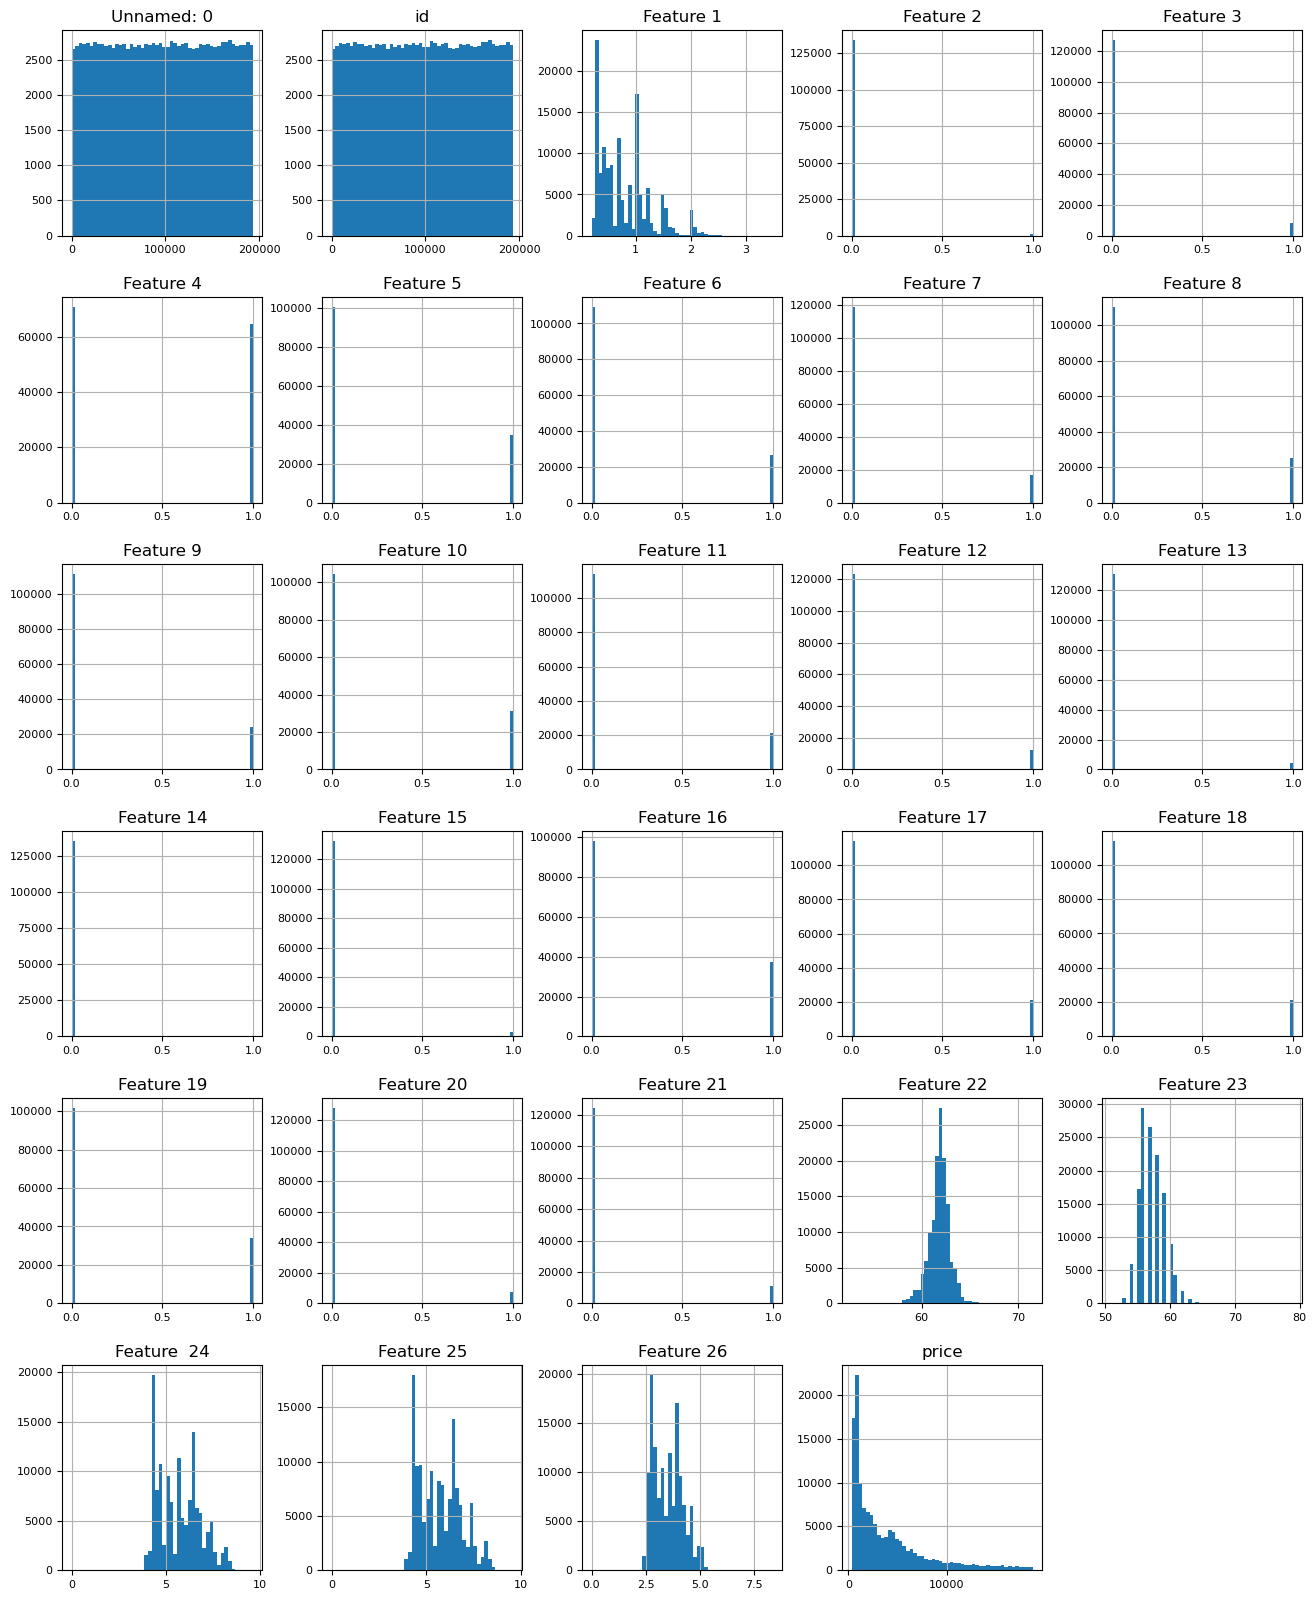

In [10]:
train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

- feature 1 -> continuous 
- feature 2 to feature 21 -> discrete 0 or 1
- feature 22 to 26 -> continuous


In [11]:
train.describe(include='all')

,Unnamed: 0,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,price
count,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,...,135501.00000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000
mean,96855.699397,96855.699397,0.791073,0.010243,0.060915,0.477428,0.257415,0.193999,0.125143,0.185895,...,0.15867,0.249061,0.053800,0.081379,61.821249,57.229102,5.715995,5.720706,3.534521,3973.809131
std,55910.125881,55910.125881,0.463126,0.100691,0.239175,0.499492,0.437212,0.395429,0.330882,0.389024,...,0.36537,0.432471,0.225624,0.273418,1.081360,1.921666,1.110367,1.103322,0.686486,4039.295151
min,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,52.700000,51.000000,0.000000,0.000000,0.000000,326.000000
25%,48413.000000,48413.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,61.300000,56.000000,4.700000,4.710000,2.900000,948.000000
50%,96819.000000,96819.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,61.900000,57.000000,5.710000,5.720000,3.530000,2404.000000
75%,145356.000000,145356.000000,1.030000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,193572.000000,3.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,71.600000,79.000000,9.650000,9.590000,8.400000,18818.000000


## Exploratory Data Analysis

## analyse price

In [12]:
train['price'].describe()

count    135501.000000
mean       3973.809131
std        4039.295151
min         326.000000
25%         948.000000
50%        2404.000000
75%        5408.000000
max       18818.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

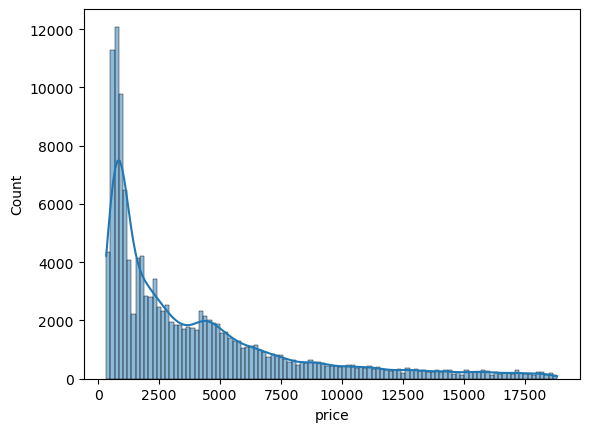

In [13]:
sns.histplot(train['price'],kde=True)

positively skewed

## correlation 

In [14]:
train.corr()['price'].sort_values(ascending=False)

price          1.000000
Feature 1      0.943248
Feature 25     0.900874
Feature  24    0.900871
Feature 26     0.896957
Feature 23     0.175785
Feature 17     0.135731
Feature 12     0.121638
Feature 5      0.120111
Feature 11     0.087738
Feature 13     0.082651
Feature 16     0.024520
Feature 6      0.022625
Feature 2      0.021827
Feature 10     0.021192
Feature 3      0.012752
Feature 19     0.008753
Feature 22     0.002324
id            -0.000779
Unnamed: 0    -0.000779
Feature 14    -0.004914
Feature 18    -0.020797
Feature 9     -0.037401
Feature 15    -0.067119
Feature 21    -0.073273
Feature 7     -0.095115
Feature 8     -0.115299
Feature 20    -0.117173
Feature 4     -0.133552
Name: price, dtype: float64

Features **1,25,24,26** most correlated with Price

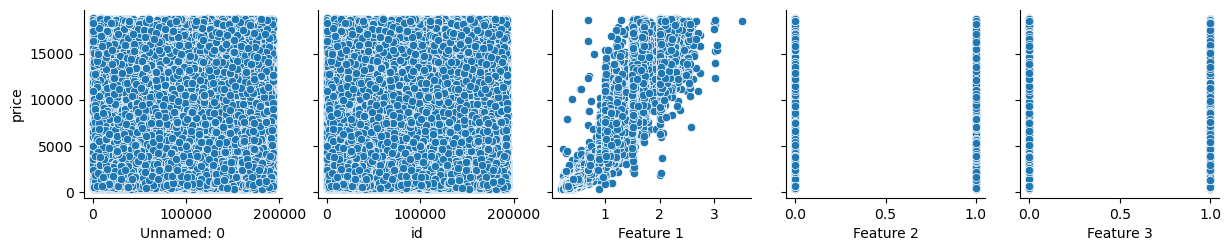

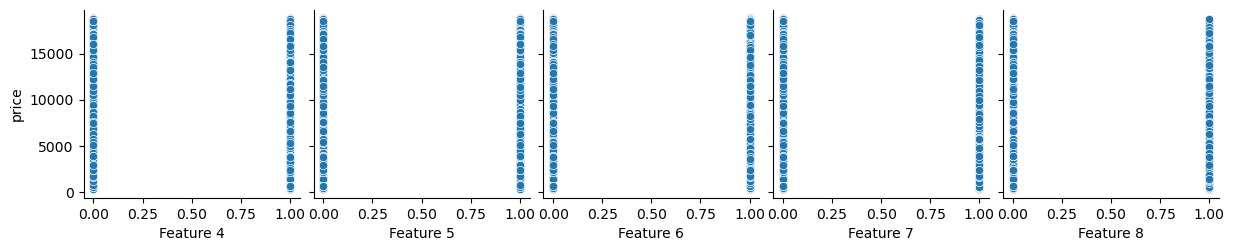

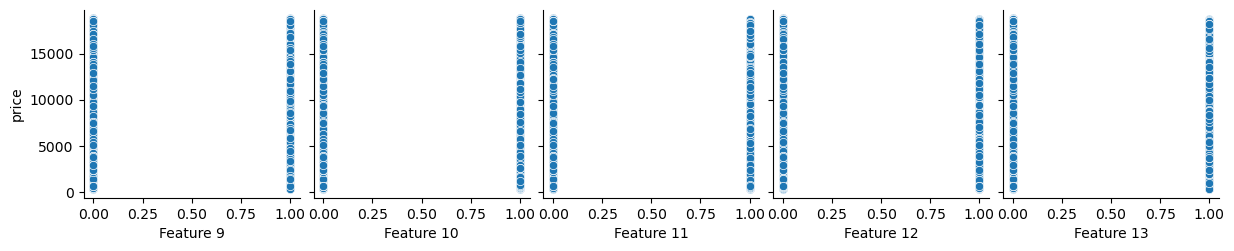

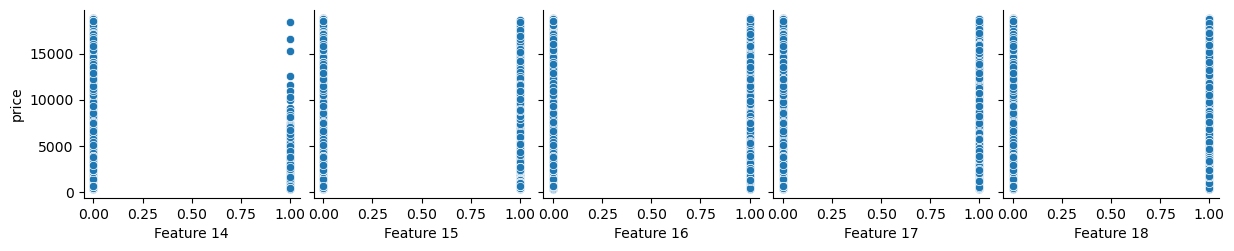

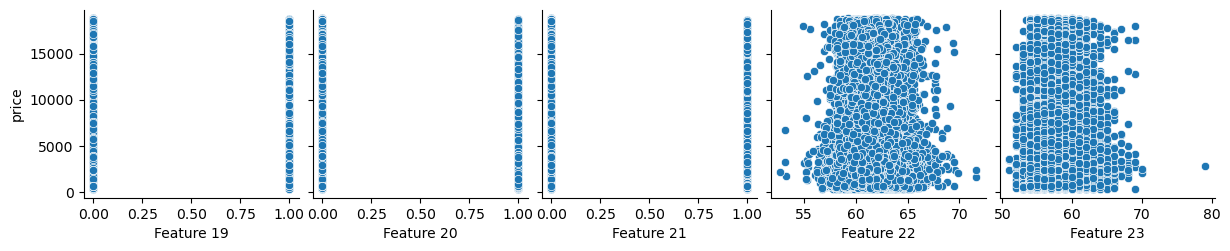

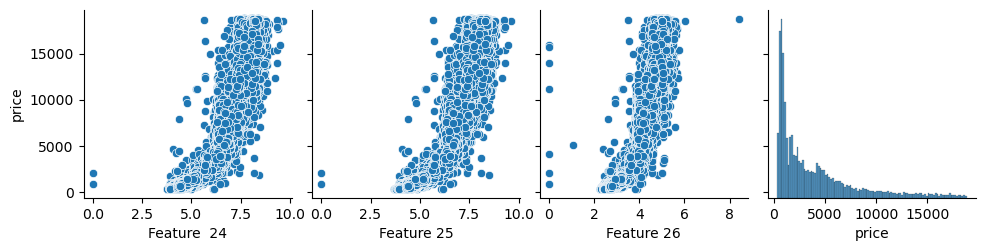

In [15]:
for i in range(0, len(train.columns), 5):
    sns.pairplot(data=train,
                x_vars=train.columns[i:i+5],
                y_vars=['price'])

In [16]:
corr=train.corr()

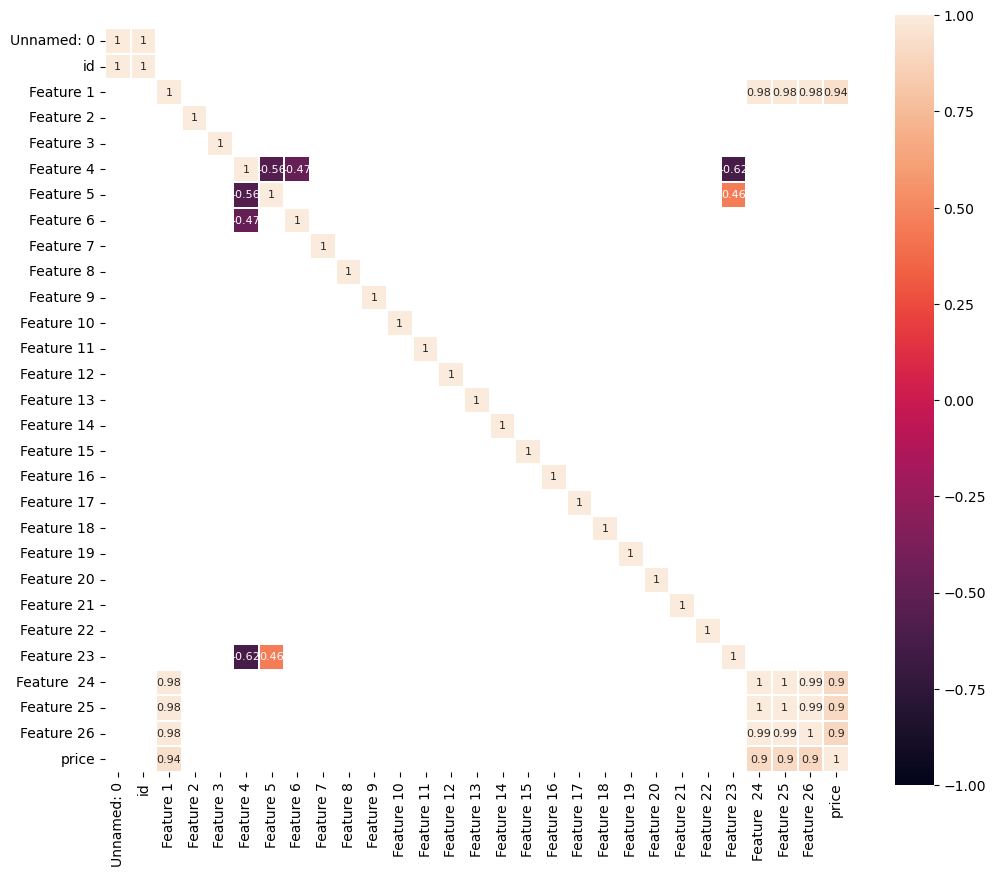

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], 
             vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);


Features **1,24,25,26** are heavily correlated among themselves can use just one of them for developing model

Features **22,23** can be discarded, no clear pattern in this 

## Features 2 to 21

In [18]:
var=list(train.columns.values.tolist())
var_cat=var[3:23]
var_cat

['Feature 2',
 'Feature 3',
 'Feature 4',
 'Feature 5',
 'Feature 6',
 'Feature 7',
 'Feature 8',
 'Feature 9',
 'Feature 10',
 'Feature 11',
 'Feature 12',
 'Feature 13',
 'Feature 14',
 'Feature 15',
 'Feature 16',
 'Feature 17',
 'Feature 18',
 'Feature 19',
 'Feature 20',
 'Feature 21']

In [19]:
# for var in var_cat:
    #data = pd.concat([train['price'], train[var]], axis=1)
    #f, ax = plt.subplots(figsize=(6, 4))
    #fig = sns.boxplot(x=var, y="price", data=data)

In [20]:
#for var in var_cat:
    #data = pd.concat([train['price'], train[var]], axis=1)
    #f, ax = plt.subplots(figsize=(6, 4))
    #fig = sns.countplot(x=var, data=data)

In [21]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(train)

VarianceThreshold(threshold=0)

In [22]:
sum(sel.get_support())

29

all features are non-constant that is they have some variance

In [23]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.01)
sel.fit(train)

VarianceThreshold(threshold=0.01)

In [24]:
sum(sel.get_support())

28

In [25]:
[x for x in train.columns if x not in train.columns[sel.get_support()]]

['Feature 14']

**Feature 14** shows the same value for 99% of the observations 

In [26]:
train[train['Feature 14']==1]['price'].median()

3437.5

Feature 14's 1s dont represent anything special in the dataset so there is no point learning it with its low variance and can be dropped

so far **features 14,22,23,24,25,26** seem droppable

### using chisquared test to find binary feature best suited for price prediction

need to convert target variable price into discrete steps to make it look like categorical value

In [27]:
x_cat=train[var_cat]
y=train['price']

In [28]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
price_target = discretizer.fit_transform(np.array(y).reshape(-1, 1))

In [29]:
train['price'].head()

0     1656
1     1063
2    18508
3      723
4     3187
Name: price, dtype: int64

In [30]:
price_target.ravel()

array([1., 1., 4., ..., 4., 2., 4.])

In [31]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=5) # select top 5 features based on chi-squared test
x_new = selector.fit_transform(x_cat,price_target.ravel() )

In [32]:
selected_indices =selector.get_support(indices=True)

selected_feature_names = x_cat.columns[selected_indices].tolist()
print("Selected feature names:", selected_feature_names)

Selected feature names: ['Feature 4', 'Feature 8', 'Feature 15', 'Feature 17', 'Feature 20']


In [33]:
print(selector.scores_)

[ 483.29712945 1258.53694469 3264.47366601 2061.34817335 1008.21104278
 1186.05613007 2671.58920681  318.4764753   519.62510975 2218.91142787
 1930.70619664 1107.17966745  213.37585033 4033.56771247 2626.0758211
 8439.43637791 2001.59890691 1069.48928601 4628.77585503 2595.30962095]


Features **4,5,8,11,15,16,17,20,21** best suited to price

# Model

In [34]:
list(train.columns.values.tolist())

['Unnamed: 0',
 'id',
 'Feature 1',
 'Feature 2',
 'Feature 3',
 'Feature 4',
 'Feature 5',
 'Feature 6',
 'Feature 7',
 'Feature 8',
 'Feature 9',
 'Feature 10',
 'Feature 11',
 'Feature 12',
 'Feature 13',
 'Feature 14',
 'Feature 15',
 'Feature 16',
 'Feature 17',
 'Feature 18',
 'Feature 19',
 'Feature 20',
 'Feature 21',
 'Feature 22',
 'Feature 23',
 'Feature  24',
 'Feature 25',
 'Feature 26',
 'price']

In [35]:
predictors=train.drop(['Unnamed: 0','id','Feature 2','Feature 3',
 'Feature 6',
 'Feature 7',
 'Feature 9',
 'Feature 10',
 'Feature 12',
 'Feature 13',
 'Feature 14','Feature 18',
 'Feature 19',
 'Feature 22','Feature 23',
 'Feature  24',
 'Feature 25',
 'Feature 26',
 'price'],axis=1)

In [36]:
_test=test.drop(['Unnamed: 0','id','Feature 2','Feature 3',
 'Feature 6',
 'Feature 7',
 'Feature 9',
 'Feature 10',
 'Feature 12',
 'Feature 13',
 'Feature 14','Feature 18',
 'Feature 19',
 'Feature 22','Feature 23',
 'Feature  24',
 'Feature 25',
 'Feature 26'],axis=1)

## Split the Dataset

In [37]:
from sklearn.model_selection import train_test_split
target = train["price"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.25, random_state = 0)

## Linear Regression Model

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [39]:
y_predlin = model.predict(x_val)
mse = mean_squared_error(y_val, y_predlin)

print("Mean squared error:", mse)

Mean squared error: 1350502.7245808376


## Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor
dec_model = DecisionTreeRegressor(random_state=42)
dec_model.fit(x_train, y_train)
y_preddec = dec_model.predict(x_val)

mse = mean_squared_error(y_val, y_preddec)
print("Mean squared error:", mse)

Mean squared error: 826617.8653591415


## Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(x_train, y_train)
y_pred_rf = rf_reg.predict(x_val)

mse = mean_squared_error(y_val, y_pred_rf)
print("Mean squared error:", mse)

Mean squared error: 796097.2126762946


## XGBRegressor


In [42]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
xgb_reg.fit(x_train, y_train)
y_pred_xgb = xgb_reg.predict(x_val)

mse = mean_squared_error(y_val, y_pred_xgb)
print("Mean squared error:", mse)

Mean squared error: 756553.1052905738


## SVR

## Using NN

## Submission

In [43]:
pred = pd.DataFrame({'Predicted': y_pred_xgb.flatten()})
pred

,Predicted
0,2923.132080
1,2535.379639
2,6189.275879
3,990.377502
4,857.324890
...,...
33871,5872.888672
33872,743.827515
33873,742.106750
33874,6189.275879


In [44]:
y_submit = xgb_reg.predict(_test)


In [45]:
sample_submission["price"]=y_submit

In [46]:
sample_submission.to_csv("submission.csv", index=False)


In [47]:
submission=pd.read_csv('submission.csv')
submission.head()

,id,price
0,132523,3045.34740
1,70210,1412.29020
2,93051,4583.98000
3,67325,707.52893
4,189522,570.93660


## MAE, MSE, and RMSE results
